# 1️⃣ Import Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel("online_course_recommendation_v2 (3).xlsx")

In [3]:
df.head()

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,39.1,Yes,Beginner,5.0,21600,317.50,0.797,Yes,17.60,4
1,861,1928,Cybersecurity for Professionals,Alexander Young,36.3,Yes,Beginner,4.3,15379,40.99,0.770,Yes,28.97,9
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,13.4,Yes,Beginner,3.9,6431,380.81,0.772,Yes,52.44,4
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,58.3,Yes,Beginner,3.1,48245,342.80,0.969,No,22.29,6
4,11285,3361,Ethical Hacking Masterclass,Daniel White,30.8,Yes,Beginner,2.8,34556,381.01,0.555,Yes,22.01,5


In [4]:
df.shape

(100000, 14)

In [5]:
df.info

<bound method DataFrame.info of        user_id  course_id                           course_name  \
0        15796       9366                  Python for Beginners   
1          861       1928       Cybersecurity for Professionals   
2        38159       9541      DevOps and Continuous Deployment   
3        44733       3708       Project Management Fundamentals   
4        11285       3361           Ethical Hacking Masterclass   
...        ...        ...                                   ...   
99995    10647       5466             Graphic Design with Canva   
99996    13800       2623   Stock Market and Trading Strategies   
99997    47131       1556  Networking and System Administration   
99998    49654       6001             Graphic Design with Canva   
99999    12929       5763             Graphic Design with Canva   

            instructor  course_duration_hours certification_offered  \
0          Emma Harris                   39.1                   Yes   
1      Alexander Youn

In [6]:
df.isnull().sum()

user_id                     0
course_id                   0
course_name                 0
instructor                  0
course_duration_hours       0
certification_offered       0
difficulty_level            0
rating                      0
enrollment_numbers          0
course_price                0
feedback_score              0
study_material_available    0
time_spent_hours            0
previous_courses_taken      0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()


,user_id,course_id,course_duration_hours,rating,enrollment_numbers,course_price,feedback_score,time_spent_hours,previous_courses_taken
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,24935.663570,5006.863560,52.38354,3.959859,25052.822850,261.073369,0.746865,20.691054,4.992670
std,14406.960108,2882.085456,27.42347,0.729958,14388.188356,139.013758,0.143683,13.669148,2.237259
min,1.000000,1.000000,5.00000,1.000000,50.000000,20.000000,0.092000,1.000000,0.000000
25%,12487.750000,2523.000000,28.60000,3.500000,12583.750000,140.100000,0.649000,9.900000,3.000000
50%,24793.500000,5012.000000,52.40000,4.000000,25057.500000,262.310000,0.750000,19.920000,5.000000
75%,37382.250000,7502.000000,76.10000,4.500000,37522.000000,381.702500,0.851000,30.080000,6.000000
max,49999.000000,9999.000000,100.00000,5.000000,49999.000000,500.000000,1.000000,84.150000,19.000000


In [9]:
df.isnull().sum()

user_id                     0
course_id                   0
course_name                 0
instructor                  0
course_duration_hours       0
certification_offered       0
difficulty_level            0
rating                      0
enrollment_numbers          0
course_price                0
feedback_score              0
study_material_available    0
time_spent_hours            0
previous_courses_taken      0
dtype: int64

# ✅ STEP 2 (Revised): Data Preprocessing (No Missing Values)

2️⃣ Encode Binary (Yes / No) Columns

In [10]:
binary_map = {'Yes': 1, 'No': 0}

df['certification_offered'] = df['certification_offered'].map(binary_map)
df['study_material_available'] = df['study_material_available'].map(binary_map)


3️⃣ Encode Ordinal Feature: Difficulty Level

In [11]:
difficulty_map = {
    'Beginner': 1,
    'Intermediate': 2,
    'Advanced': 3
}

df['difficulty_level'] = df['difficulty_level'].map(difficulty_map)


4️⃣ Separate Modeling & Display Data

In [12]:
df_model = df.drop(columns=['course_name', 'instructor'])
# For modeling

In [13]:
df_display = df[['course_id', 'course_name', 'instructor']]

# For displaying recommendations

# Feature Scaling

In [14]:
# Similarity-based recommendation requires normalized features.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_cols = [
    'course_duration_hours',
    'course_price',
    'enrollment_numbers',
    'feedback_score',
    'time_spent_hours',
    'previous_courses_taken',
    'rating'
]

df_model[scaled_cols] = scaler.fit_transform(df_model[scaled_cols])


# Final Sanity Check

In [15]:
df_model.info()
df_model.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   course_id                 100000 non-null  int64  
 2   course_duration_hours     100000 non-null  float64
 3   certification_offered     100000 non-null  int64  
 4   difficulty_level          100000 non-null  int64  
 5   rating                    100000 non-null  float64
 6   enrollment_numbers        100000 non-null  float64
 7   course_price              100000 non-null  float64
 8   feedback_score            100000 non-null  float64
 9   study_material_available  100000 non-null  int64  
 10  time_spent_hours          100000 non-null  float64
 11  previous_courses_taken    100000 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 9.2 MB


,user_id,course_id,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,0.358947,1,1,1.000,0.431440,0.619792,0.776432,1,0.199639,0.210526
1,861,1928,0.329474,1,1,0.825,0.306893,0.043729,0.746696,1,0.336380,0.473684
2,38159,9541,0.088421,1,1,0.725,0.127750,0.751688,0.748899,1,0.618641,0.210526
3,44733,3708,0.561053,1,1,0.525,0.964884,0.672500,0.965859,0,0.256043,0.315789
4,11285,3361,0.271579,1,1,0.450,0.690825,0.752104,0.509912,1,0.252676,0.263158


In [16]:
df_model.to_csv("cleaned_course_data.csv", index=False)
# Saveinggg Clean Data

# Exploratory Data Analysis (EDA)

In [17]:
df.head()
df.describe()

,user_id,course_id,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,24935.663570,5006.863560,52.38354,0.700590,1.703470,3.959859,25052.822850,261.073369,0.746865,0.851470,20.691054,4.992670
std,14406.960108,2882.085456,27.42347,0.458002,0.782998,0.729958,14388.188356,139.013758,0.143683,0.355626,13.669148,2.237259
min,1.000000,1.000000,5.00000,0.000000,1.000000,1.000000,50.000000,20.000000,0.092000,0.000000,1.000000,0.000000
25%,12487.750000,2523.000000,28.60000,0.000000,1.000000,3.500000,12583.750000,140.100000,0.649000,1.000000,9.900000,3.000000
50%,24793.500000,5012.000000,52.40000,1.000000,2.000000,4.000000,25057.500000,262.310000,0.750000,1.000000,19.920000,5.000000
75%,37382.250000,7502.000000,76.10000,1.000000,2.000000,4.500000,37522.000000,381.702500,0.851000,1.000000,30.080000,6.000000
max,49999.000000,9999.000000,100.00000,1.000000,3.000000,5.000000,49999.000000,500.000000,1.000000,1.000000,84.150000,19.000000


# Distribution of Course Ratings

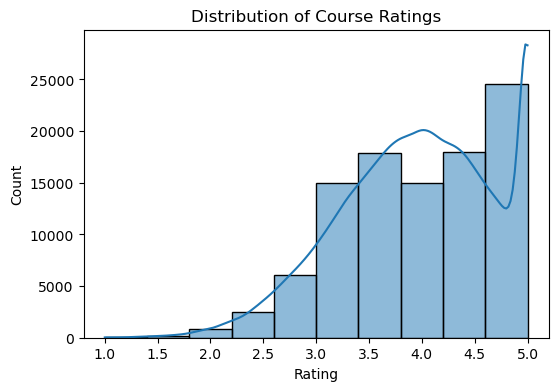

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title("Distribution of Course Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [19]:
# Most ratings cluster between 4 and 5
# Indicates generally high-quality courses

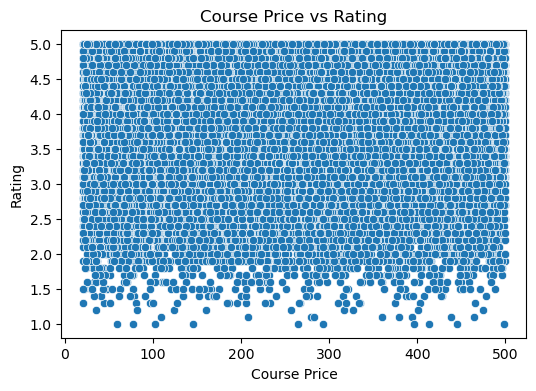

In [20]:
# Course Price vs Rating
plt.figure(figsize=(6,4))
sns.scatterplot(x='course_price', y='rating', data=df)
plt.title("Course Price vs Rating")
plt.xlabel("Course Price")
plt.ylabel("Rating")
plt.show()


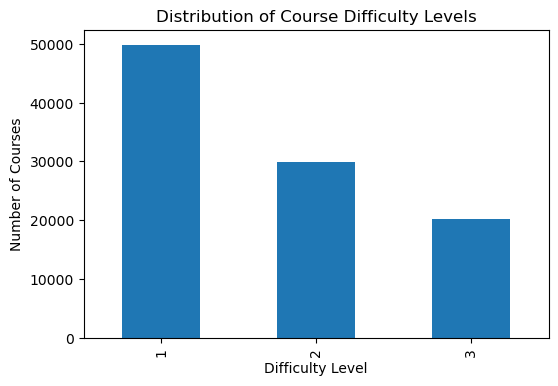

In [21]:
# Difficulty Level Distribution

difficulty_counts = df['difficulty_level'].value_counts()

plt.figure(figsize=(6,4))
difficulty_counts.plot(kind='bar')
plt.title("Distribution of Course Difficulty Levels")
plt.xlabel("Difficulty Level")
plt.ylabel("Number of Courses")
plt.show()


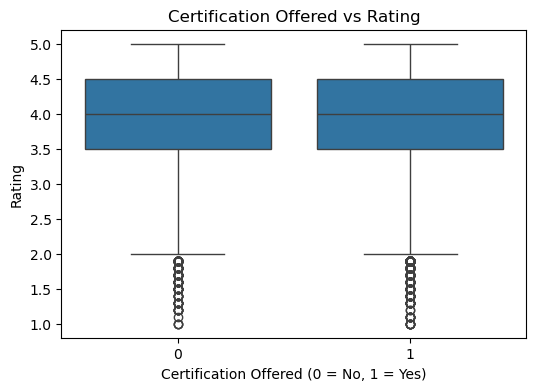

In [22]:
# Certification Impact on Ratings
plt.figure(figsize=(6,4))
sns.boxplot(x='certification_offered', y='rating', data=df)
plt.title("Certification Offered vs Rating")
plt.xlabel("Certification Offered (0 = No, 1 = Yes)")
plt.ylabel("Rating")
plt.show()


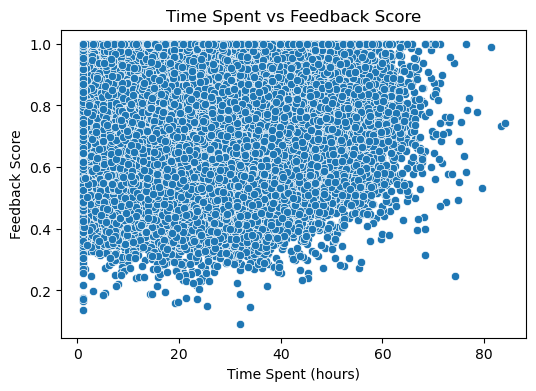

In [23]:
# Engagement: Time Spent vs Feedback Score

plt.figure(figsize=(6,4))
sns.scatterplot(x='time_spent_hours', y='feedback_score', data=df)
plt.title("Time Spent vs Feedback Score")
plt.xlabel("Time Spent (hours)")
plt.ylabel("Feedback Score")
plt.show()


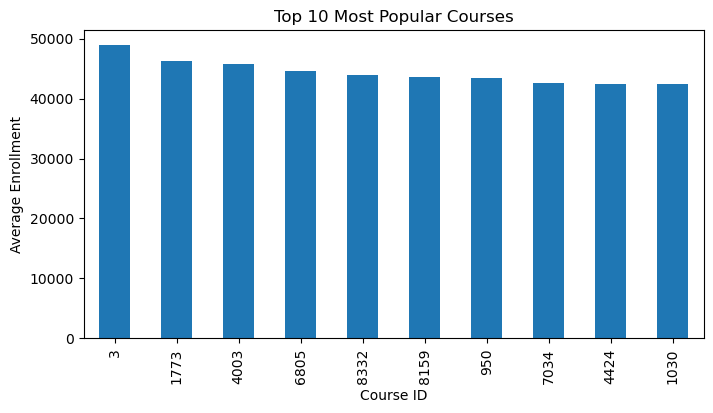

In [24]:
# Course Popularity (Enrollment Numbers)
top_courses = df.groupby('course_id')['enrollment_numbers'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
top_courses.plot(kind='bar')
plt.title("Top 10 Most Popular Courses")
plt.xlabel("Course ID")
plt.ylabel("Average Enrollment")
plt.show()


In [25]:
# A few courses dominate enrollments
#Popularity bias exists

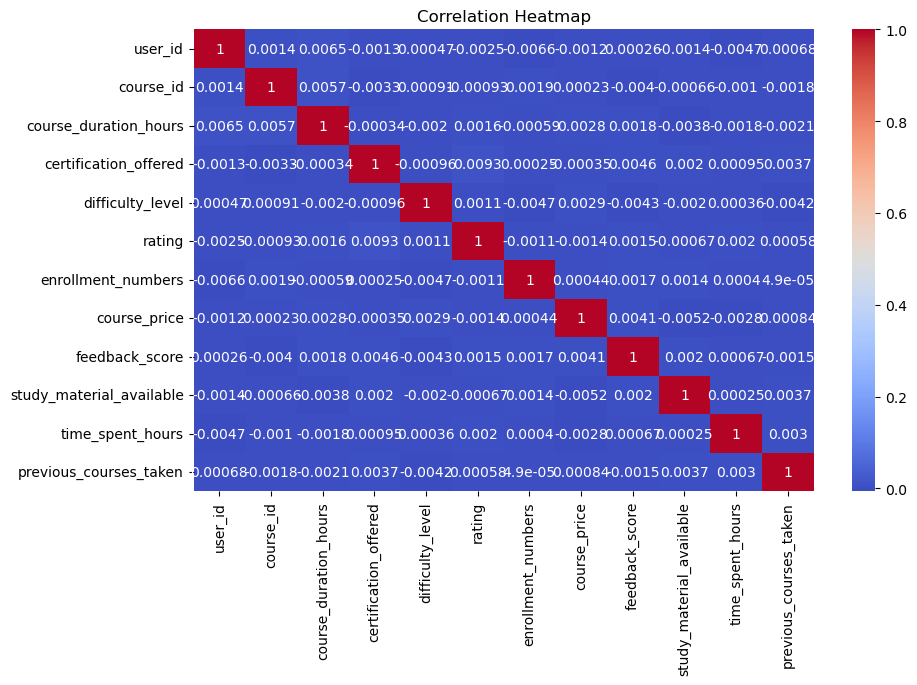

In [26]:
#Correlation Heatmap (Feature Relationships)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


EDA Summary

High ratings are linked to engagement & feedback

Certification positively impacts learner satisfaction

Price is not a strong quality indicator

Beginner-level courses dominate platform offerings

# Content-Based Recommendation System

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [28]:
# Select Features for Content Similarity
feature_cols = [
    'course_duration_hours',
    'course_price',
    'difficulty_level',
    'certification_offered',
    'study_material_available',
    'feedback_score',
    'enrollment_numbers',
    'time_spent_hours',
    'previous_courses_taken',
    'rating'
]


In [29]:
# Feature Matrix
X = df_model[feature_cols].copy()


In [30]:
#  Create Course Index Mapping
course_indices = pd.Series(
    df_model.index,
    index=df_model['course_id']
)


In [31]:
# Final Recommendation Function
def recommend_similar_courses(course_id, top_n=5):
    """
    Recommends top_n similar courses based on content similarity
    """
    
    # Validate course ID
    if course_id not in course_indices:
        return "Invalid course ID"
    
    # Get index of selected course
    idx = course_indices[course_id]
    
    # Extract course feature vector
    course_vector = X.iloc[idx].values.reshape(1, -1)
    
    # Compute cosine similarity (memory-safe)
    similarity_scores = cosine_similarity(course_vector, X)[0]
    
    # Get top similar courses (excluding itself)
    similar_indices = similarity_scores.argsort()[::-1][1:top_n+1]
    
    # Return human-readable results
    return df.loc[
        similar_indices,
        ['course_id', 'course_name', 'instructor', 'rating']
    ]


In [32]:
# Collaborative Filtering
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
# Create User–Item Matrix
user_item_matrix = df.pivot_table(
    index='user_id',
    columns='course_id',
    values='rating'
)


In [34]:
# Fill Missing Ratings

user_item_matrix_filled = user_item_matrix.fillna(0)


In [35]:
# Compute User–User Similarity (Cosine) 
# ⚠️ This matrix is user × user, usually much smaller than item–item.

user_similarity = cosine_similarity(user_item_matrix_filled)


In [36]:
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_item_matrix.index,
    columns=user_item_matrix.index
)


In [37]:
# Core Recommendation Function (User-Based)
def recommend_courses_user_based(user_id, top_n=5):
    """
    Recommend courses to a user based on similar users
    """
    
    if user_id not in user_similarity_df.index:
        return "User ID not found"
    
    # Get similar users (excluding self)
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:6]
    
    # Courses already rated by the user
    user_courses = user_item_matrix.loc[user_id]
    rated_courses = user_courses[user_courses > 0].index
    
    # Aggregate ratings from similar users
    recommendations = {}
    
    for sim_user, similarity_score in similar_users.items():
        sim_user_ratings = user_item_matrix.loc[sim_user]
        
        for course_id, rating in sim_user_ratings.items():
            if course_id not in rated_courses and rating > 0:
                recommendations[course_id] = recommendations.get(course_id, 0) + similarity_score * rating
    
    # Sort and select top courses
    recommended_course_ids = sorted(
        recommendations,
        key=recommendations.get,
        reverse=True
    )[:top_n]
    
    return df[df['course_id'].isin(recommended_course_ids)][
        ['course_id', 'course_name', 'instructor', 'rating']
    ].drop_duplicates()


# Test Collaborative Filtering

In [38]:


recommend_courses_user_based(user_id=10, top_n=5)


,course_id,course_name,instructor,rating
1109,362,Public Speaking Mastery,Isabella Scott,4.0
1422,1904,Blockchain and Decentralized Applications,Dr. Robert Davis,3.6
4424,4012,Fundamentals of Digital Marketing,David Wilson,3.7
6918,4012,Fundamentals of Digital Marketing,Charlotte King,4.3
8780,4012,Photography and Video Editing,Dr. John Smith,4.2
12016,362,Photography and Video Editing,James Clark,3.9
14169,5273,Cybersecurity for Professionals,Dr. Robert Davis,4.1
15346,362,AI for Business Leaders,Daniel White,4.6
18496,5273,Cybersecurity for Professionals,Daniel White,4.7
19812,4012,Mobile App Development with Swift,Daniel White,4.5


# Hybrid Recommendation System

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
df = pd.read_excel("online_course_recommendation_v2 (3).xlsx")



In [41]:
# Binary encoding
df['certification_offered'] = df['certification_offered'].map({'Yes': 1, 'No': 0})
df['study_material_available'] = df['study_material_available'].map({'Yes': 1, 'No': 0})

# Ordinal encoding
df['difficulty_level'] = df['difficulty_level'].map({
    'Beginner': 1,
    'Intermediate': 2,
    'Advanced': 3
})



In [42]:
# SCALE NUMERICAL FEATURES
scale_cols = [
    'course_duration_hours',
    'course_price',
    'enrollment_numbers',
    'feedback_score',
    'time_spent_hours',
    'previous_courses_taken',
    'rating'
]

scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [43]:
# BUILD MODEL DATAFRAME (LOCKED)
df_model = df[
    [
        'user_id',
        'course_id',
        'course_duration_hours',
        'course_price',
        'difficulty_level',
        'certification_offered',
        'study_material_available',
        'feedback_score',
        'enrollment_numbers',
        'time_spent_hours',
        'previous_courses_taken',
        'rating'
    ]
].copy()



In [44]:
# CONTENT FEATURE MATRIX (NUMPY ONLY)
content_features = [
    'course_duration_hours',
    'course_price',
    'difficulty_level',
    'certification_offered',
    'study_material_available',
    'feedback_score',
    'enrollment_numbers',
    'time_spent_hours',
    'previous_courses_taken',
    'rating'
]

X_content = df_model[content_features].to_numpy(dtype=np.float64)


In [45]:
print(X_content.shape)


(100000, 10)


In [46]:
# COURSE INDEX MAP (SAFE)
course_index = {
    cid: idx for idx, cid in enumerate(df_model['course_id'])
}


In [47]:
# USER–ITEM MATRIX (COLLABORATIVE PART)
user_item = df_model.pivot_table(
    index='user_id',
    columns='course_id',
    values='rating'
).fillna(0)


In [48]:
# USER SIMILARITY MATRIX
user_similarity = cosine_similarity(user_item)
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_item.index,
    columns=user_item.index
)


In [49]:
# CONTENT SIMILARITY FUNCTION (BULLETPROOF)

def content_scores(reference_course_id):
    if reference_course_id not in course_index:
        return {}
    
    idx = course_index[reference_course_id]
    ref_vector = X_content[idx].reshape(1, -1)
    
    scores = cosine_similarity(ref_vector, X_content)[0]
    return dict(zip(df_model['course_id'], scores))


In [50]:
# COLLABORATIVE SCORES FUNCTION
def collaborative_scores(user_id, top_k_users=5):
    if user_id not in user_similarity_df.index:
        return {}
    
    similar_users = (
        user_similarity_df[user_id]
        .sort_values(ascending=False)
        .iloc[1:top_k_users+1]
    )
    
    scores = {}
    
    for sim_user, sim_val in similar_users.items():
        ratings = user_item.loc[sim_user]
        for course_id, rating in ratings.items():
            if rating > 0:
                scores[course_id] = scores.get(course_id, 0) + sim_val * rating
    
    return scores


# FINAL HYBRID RECOMMENDATION FUNCTION

In [51]:
def hybrid_recommendation(user_id=None, reference_course_id=None, top_n=5, alpha=0.5):
    """
    alpha = weight for content-based
    1-alpha = weight for collaborative
    """
    
    c_scores = {}
    cf_scores = {}
    
    if reference_course_id is not None:
        c_scores = content_scores(reference_course_id)
    
    if user_id is not None:
        cf_scores = collaborative_scores(user_id)
    
    final_scores = {}
    
    for cid in set(c_scores) | set(cf_scores):
        final_scores[cid] = (
            alpha * c_scores.get(cid, 0) +
            (1 - alpha) * cf_scores.get(cid, 0)
        )
    
    top_courses = sorted(
        final_scores,
        key=final_scores.get,
        reverse=True
    )[:top_n]
    
    return df[df['course_id'].isin(top_courses)][
        ['course_id', 'course_name', 'instructor', 'rating']
    ].drop_duplicates()


# Test Hybrid Recommendation

In [52]:
hybrid_recommendation(
    user_id=None,
    reference_course_id=101,
    top_n=5
)


,course_id,course_name,instructor,rating
916,101,Python for Beginners,Alexander Young,0.800
1009,5398,Ethical Hacking Masterclass,Jessica Martinez,0.750
2079,101,Graphic Design with Canva,William Thomas,0.725
7705,9451,AI for Business Leaders,William Thomas,0.800
9491,4035,Networking and System Administration,Charlotte King,0.800
12020,5398,AI for Business Leaders,Isabella Scott,0.775
13572,3801,Graphic Design with Canva,Emma Harris,0.650
16564,101,Ethical Hacking Masterclass,Prof. Emily Johnson,0.800
19462,4035,Public Speaking Mastery,Emma Harris,0.400
20873,5398,Networking and System Administration,Michael Brown,0.350


In [53]:
hybrid_recommendation(
    user_id=10,
    reference_course_id=101,
    top_n=5
)


,course_id,course_name,instructor,rating
778,8190,Project Management Fundamentals,Dr. John Smith,1.000
1109,362,Public Speaking Mastery,Isabella Scott,0.750
4424,4012,Fundamentals of Digital Marketing,David Wilson,0.675
6918,4012,Fundamentals of Digital Marketing,Charlotte King,0.825
8780,4012,Photography and Video Editing,Dr. John Smith,0.800
12016,362,Photography and Video Editing,James Clark,0.725
15346,362,AI for Business Leaders,Daniel White,0.900
15716,2433,Game Development with Unity,Daniel White,0.800
16446,2433,Blockchain and Decentralized Applications,Emma Harris,0.725
18451,2433,Cybersecurity for Professionals,Isabella Scott,0.375


# implemented a hybrid recommender by combining content-based cosine similarity on a fixed numerical feature matrix with user-based collaborative filtering. I ensured stability by locking feature dimensions and using NumPy arrays to avoid shape drift.

In [54]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# =====================================================
# 1. LOAD DATA (CONFIRMED PATH)
# =====================================================
DATA_FILE = r"online_course_recommendation_v2 (3).xlsx"

if not os.path.exists(DATA_FILE):
    raise FileNotFoundError(f"Dataset not found at: {DATA_FILE}")

df = pd.read_excel(DATA_FILE)

# =====================================================
# 2. PREPROCESSING
# =====================================================
df['certification_offered'] = df['certification_offered'].map({'Yes': 1, 'No': 0})
df['study_material_available'] = df['study_material_available'].map({'Yes': 1, 'No': 0})

df['difficulty_level'] = df['difficulty_level'].map({
    'Beginner': 1,
    'Intermediate': 2,
    'Advanced': 3
})

# =====================================================
# 3. FEATURE SCALING
# =====================================================
scale_cols = [
    'course_duration_hours',
    'course_price',
    'enrollment_numbers',
    'feedback_score',
    'time_spent_hours',
    'previous_courses_taken',
    'rating'
]

scaler = MinMaxScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# =====================================================
# 4. MODEL DATAFRAME (LOCKED)
# =====================================================
df_model = df[
    [
        'user_id',
        'course_id',
        'course_duration_hours',
        'course_price',
        'difficulty_level',
        'certification_offered',
        'study_material_available',
        'feedback_score',
        'enrollment_numbers',
        'time_spent_hours',
        'previous_courses_taken',
        'rating'
    ]
].copy()

# =====================================================
# 5. CONTENT-BASED MODEL
# =====================================================
content_features = [
    'course_duration_hours',
    'course_price',
    'difficulty_level',
    'certification_offered',
    'study_material_available',
    'feedback_score',
    'enrollment_numbers',
    'time_spent_hours',
    'previous_courses_taken',
    'rating'
]

X_content = df_model[content_features].to_numpy(dtype=np.float64)

course_index = {
    cid: idx for idx, cid in enumerate(df_model['course_id'])
}

def content_scores(course_id):
    if course_id not in course_index:
        return {}
    
    idx = course_index[course_id]
    ref_vector = X_content[idx].reshape(1, -1)
    scores = cosine_similarity(ref_vector, X_content)[0]
    
    return dict(zip(df_model['course_id'], scores))

# =====================================================
# 6. COLLABORATIVE FILTERING
# =====================================================
user_item = df_model.pivot_table(
    index='user_id',
    columns='course_id',
    values='rating'
).fillna(0)

user_similarity = cosine_similarity(user_item)

user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_item.index,
    columns=user_item.index
)

def collaborative_scores(user_id, top_k_users=5):
    if user_id not in user_similarity_df.index:
        return {}
    
    similar_users = (
        user_similarity_df[user_id]
        .sort_values(ascending=False)
        .iloc[1:top_k_users + 1]
    )
    
    scores = {}
    for sim_user, sim_val in similar_users.items():
        ratings = user_item.loc[sim_user]
        for course_id, rating in ratings.items():
            if rating > 0:
                scores[course_id] = scores.get(course_id, 0) + sim_val * rating
    
    return scores

# =====================================================
# 7. HYBRID RECOMMENDATION SYSTEM (FINAL & CLEAN)
# =====================================================
def hybrid_recommendation(user_id=None, reference_course_id=None, top_n=5, alpha=0.5):
    """
    Hybrid Recommendation System

    user_id: int or None (None = cold start)
    reference_course_id: int
    top_n: number of unique course recommendations
    alpha: weight for content-based filtering
    """
    
    content_part = {}
    collaborative_part = {}

    if reference_course_id is not None:
        content_part = content_scores(reference_course_id)

    if user_id is not None:
        collaborative_part = collaborative_scores(user_id)

    # Combine scores
    final_scores = {}
    for cid in set(content_part) | set(collaborative_part):
        final_scores[cid] = (
            alpha * content_part.get(cid, 0) +
            (1 - alpha) * collaborative_part.get(cid, 0)
        )

    # Select top course IDs
    top_course_ids = sorted(
        final_scores,
        key=final_scores.get,
        reverse=True
    )[:top_n]

    # Return UNIQUE courses only (clean output)
    result = (
        df[df['course_id'].isin(top_course_ids)]
        .sort_values('rating', ascending=False)
        .groupby('course_id', as_index=False)
        .first()
        [['course_id', 'course_name', 'instructor', 'rating']]
        .head(top_n)
    )

    return result


In [55]:
# Cold-start user
hybrid_recommendation(reference_course_id=101, top_n=5)

# Existing user
hybrid_recommendation(user_id=10, reference_course_id=101, top_n=5)


,course_id,course_name,instructor,rating
0,362,AI for Business Leaders,Daniel White,0.900
1,1120,Stock Market and Trading Strategies,Ethan Hall,1.000
2,2433,Photography and Video Editing,Jessica Martinez,0.925
3,4012,Game Development with Unity,Sarah Lee,0.975
4,8190,Project Management Fundamentals,Dr. John Smith,1.000
